In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud


In [10]:
import squarify

In [11]:
data=pd.read_csv("data.csv")
data=data.drop("Unnamed: 0",axis=1)
data.head()

Name Sex   Age            Team        Games  Year  \
0                 A Dijiang   M  24.0           China  1992 Summer  1992   
1                  A Lamusi   M  23.0           China  2012 Summer  2012   
2       Gunnar Nielsen Aaby   M  24.0         Denmark  1920 Summer  1920   
3      Edgar Lindenau Aabye   M  34.0  Denmark/Sweden  1900 Summer  1900   
4  Christine Jacoba Aaftink   F  21.0     Netherlands  1988 Winter  1988   

   Season          Sport  Medal  
0  Summer     Basketball      0  
1  Summer           Judo      0  
2  Summer       Football      0  
3  Summer     Tug-Of-War      3  
4  Winter  Speed Skating      0

In [13]:
values_year=data['Year'].unique()
values_year.sort()
values_year

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016, 2020])

In [12]:
data.isnull().sum()

Name         0
Sex          0
Age       9474
Team         0
Games        0
Year         0
Season       0
Sport        0
Medal        0
dtype: int64

In [14]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data.isnull().sum()

Name      0
Sex       0
Age       0
Team      0
Games     0
Year      0
Season    0
Sport     0
Medal     0
dtype: int64

In [15]:
len(data.Team.unique())

1203

In [16]:
year=2020
data_year = data.loc[data['Year'] == year]
top_countries=data_year.Team.value_counts().sort_values(ascending=False).head(20)
indexes=list(top_countries.keys())
values=top_countries.values
graph1data=pd.DataFrame({"Countries":indexes, "Participation":values})
graph1data.head()

Countries  Participation
0                       Japan            262
1  People's Republic of China            256
2                         RPC            248
3    United States of America            243
4                      Brazil            241

In [17]:

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Overall Participation Countrywise in '+str(year))
sns.barplot(x=top_countries.index, y=top_countries);

In [18]:
u_team = data.Team.unique()
fig, ax = plt.subplots(1, figsize=(20, 20))
top_countries = data.Team.value_counts().sort_values(ascending=False).head(20)
squarify.plot(sizes=top_countries, label=u_team, alpha=.8)


<AxesSubplot:>

In [31]:
count_discipline = data.Sport.value_counts()
count_discipline
sns.set_style("ticks")

wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='black')


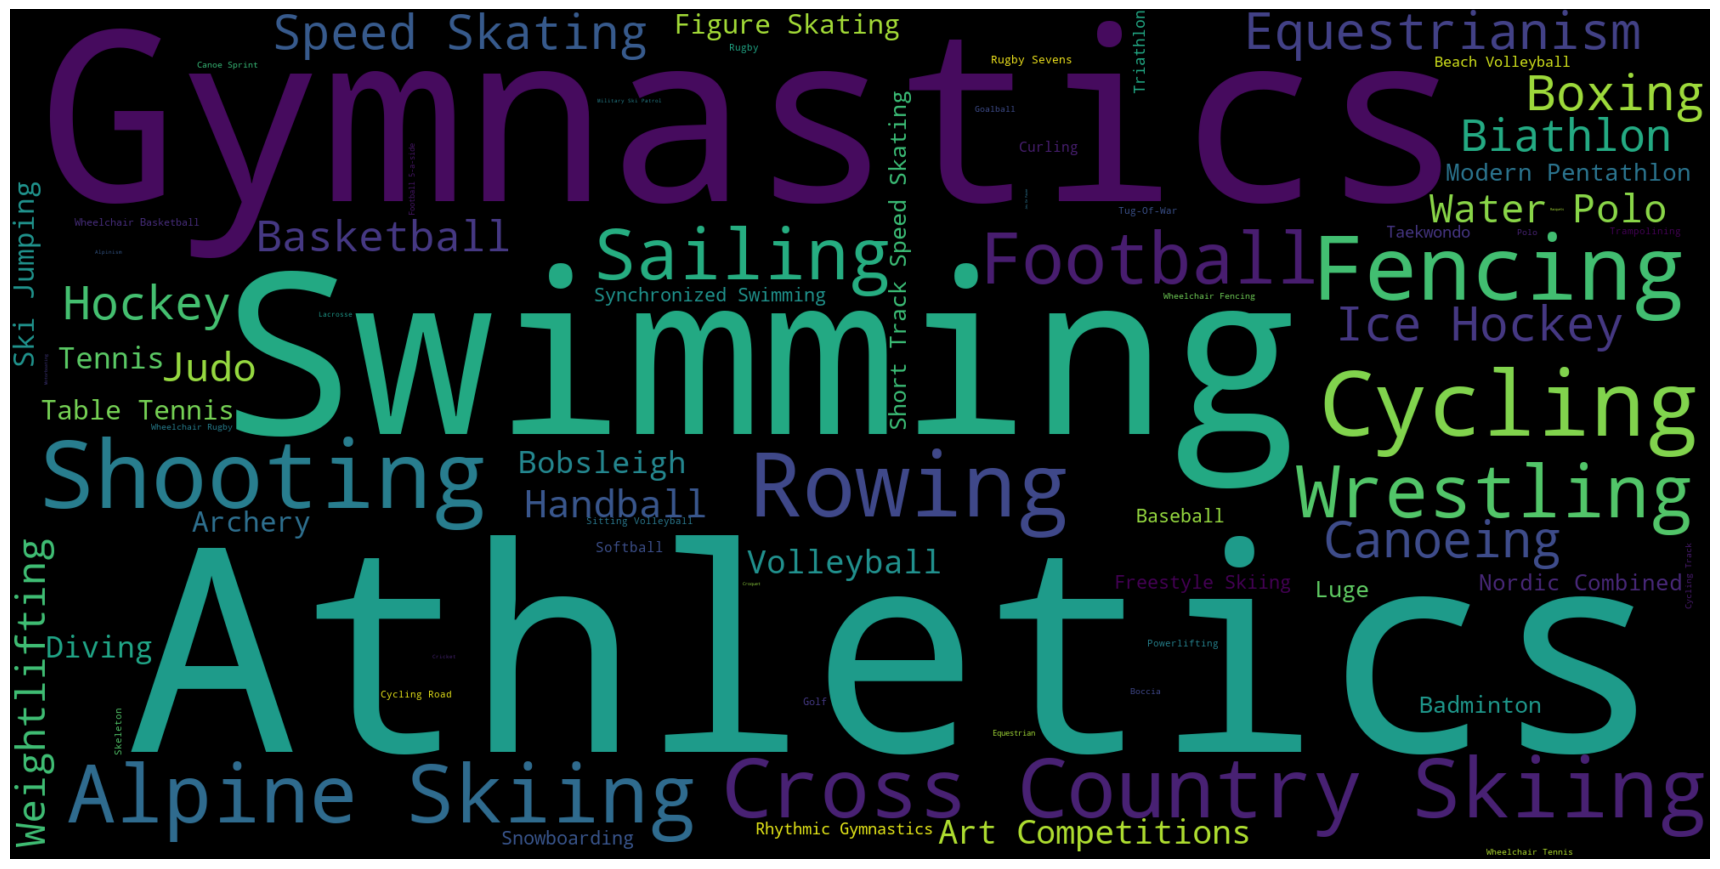

In [32]:

wordcloud.generate_from_frequencies(frequencies = count_discipline)
plt.figure(figsize=(17,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud.png")
plt.tight_layout(pad=0)
plt.show()

In [76]:
top_countries=data.Team.value_counts().sort_values(ascending=False).head(1203)
u_team=data.Team.unique()
import plotly.express as px
fig=px.treemap(path=[u_team],values=top_countries)
fig.show()

In [77]:
data

Name     Sex   Age                      Team  \
0                      A Dijiang       M  24.0                     China   
1                       A Lamusi       M  23.0                     China   
2            Gunnar Nielsen Aaby       M  24.0                   Denmark   
3           Edgar Lindenau Aabye       M  34.0            Denmark/Sweden   
4       Christine Jacoba Aaftink       F  21.0               Netherlands   
...                          ...     ...   ...                       ...   
275638           ZURABIANI Zurab    Male  21.0                   Georgia   
275639          ZURBRUGG Lindsey  Female  22.0  United States of America   
275640         ZVINOWANDA Vimbai  Female  29.0                  Zimbabwe   
275641             ZWOUKHI Fathi    Male  34.0                   Tunisia   
275642           ZYLKA Krzysztof    Male  41.0                    Poland   

              Games  Year  Season                  Sport  Medal  
0       1992 Summer  1992  Summer             Basketball      0  
1       2012 Summer  2012  Summer                   Judo      0  
2       1920 Summer  1920  Summer               Football      0  
3       1900 Summer  1900  Summer             Tug-Of-War      3  
4       1988 Winter  1988  Winter          Speed Skating      0  
...             ...   ...     ...                    ...    ...  
275638  2020 Summer  2020  Summer                   Judo      0  
275639  2020 Summer  2020  Summer  Wheelchair Basketball      1  
275640  2020 Summer  2020  Summer              Athletics      0  
275641  2020 Summer  2020  Summer              Triathlon      0  
275642  2020 Summer  2020  Summer           Table Tennis      0  

[275643 rows x 9 columns]

In [78]:
u_team=data.Team.unique()
fig = px.choropleth(locationmode="country names",locations=u_team, color=top_countries)
fig.show()

In [79]:
data

Name     Sex   Age                      Team  \
0                      A Dijiang       M  24.0                     China   
1                       A Lamusi       M  23.0                     China   
2            Gunnar Nielsen Aaby       M  24.0                   Denmark   
3           Edgar Lindenau Aabye       M  34.0            Denmark/Sweden   
4       Christine Jacoba Aaftink       F  21.0               Netherlands   
...                          ...     ...   ...                       ...   
275638           ZURABIANI Zurab    Male  21.0                   Georgia   
275639          ZURBRUGG Lindsey  Female  22.0  United States of America   
275640         ZVINOWANDA Vimbai  Female  29.0                  Zimbabwe   
275641             ZWOUKHI Fathi    Male  34.0                   Tunisia   
275642           ZYLKA Krzysztof    Male  41.0                    Poland   

              Games  Year  Season                  Sport  Medal  
0       1992 Summer  1992  Summer             Basketball      0  
1       2012 Summer  2012  Summer                   Judo      0  
2       1920 Summer  1920  Summer               Football      0  
3       1900 Summer  1900  Summer             Tug-Of-War      3  
4       1988 Winter  1988  Winter          Speed Skating      0  
...             ...   ...     ...                    ...    ...  
275638  2020 Summer  2020  Summer                   Judo      0  
275639  2020 Summer  2020  Summer  Wheelchair Basketball      1  
275640  2020 Summer  2020  Summer              Athletics      0  
275641  2020 Summer  2020  Summer              Triathlon      0  
275642  2020 Summer  2020  Summer           Table Tennis      0  

[275643 rows x 9 columns]

In [80]:
data_age=list(data.Age)
data_medal=list(data.Medal)
for i in range(len(data_medal)):
    if(data_medal[i]>0):
        data_medal[i]=1

data_pie=pd.DataFrame({"Age":data_age, "Medal":data_medal})

In [90]:
result=data_pie.sort_values('Age')
result.drop(result[result['Age'] > 70].index, inplace = True)
  

In [91]:
fig = px.pie(result, values='Medal', names='Age')
fig.show()
